# Amina Bano

M.sc in Machine learning and Artificial intelligence


## Case Study on Loan

This notebook looks into using various Python-Based Machine learning and data science libraries in an attempt to build a machine learning model to find out whether what features caused clients to default on their loans by performing exploratory data analysis on the loan dataset. 

We're going to take this approches;

1. Problem Defination
2. Data
3. Evaluation
4. Conclusion

## 1. Problem Defination

In a statement,
> Given paramenters about the customers labelled as 'charged-off' are the 'defaulters'.

## 2. Data

The Data came from upGrad - Assignment to undesratnd Like how to perform EDA

## Evaluation

If we can reach 95% accuracy at predicting whether we can give loan to the customer or not

Import necessary libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Load CSV file

In [34]:
data = pd.read_csv("loan.csv")

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [36]:
data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

Create a clean dataset without rows with missing values

In [37]:
def missing_values_table(df): 
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum()/len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns

In [38]:
data = data.drop(data.columns[data.apply(lambda col: col.isnull().sum()/len(data) > 0.60)], axis=1)

In [39]:
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,13,0,7274,13.10%,40,f,0.00,0.00,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,6,0,8847,26.90%,9,f,0.00,0.00,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidat

In [40]:
data = data.drop(['pymnt_plan','emp_title','title','url','zip_code','sub_grade','last_credit_pull_d','out_prncp','out_prncp_inv','collections_12_mths_ex_med','earliest_cr_line','policy_code','initial_list_status','acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'], axis=1)
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,INDIVIDUAL,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.00,0,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,INDIVIDUAL,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,INDIVIDUAL,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.00,0,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,INDIVIDUAL,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.94,0,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,INDIVIDUAL,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,INDIVIDUAL,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,INDIVIDUAL,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,NaN,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,INDIVIDUAL,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,NaN,other,MD,3.72,0,0,17,0,85607,0.70%,26,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,INDIVIDUAL,NaN


In [41]:
data['term'].str.split("m")
data['term(months)']=data['term'].str.split('m').str[0]
data['term(months)'] = data['term(months)'].astype(int)

del data['term']
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies,term(months)
0,1077501,1296599,5000,5000,4975.0,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,INDIVIDUAL,0.0,36
1,1077430,1314167,2500,2500,2500.0,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.00,0,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,INDIVIDUAL,0.0,60
2,1077175,1313524,2400,2400,2400.0,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,INDIVIDUAL,0.0,36
3,1076863,1277178,10000,10000,10000.0,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.00,0,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,INDIVIDUAL,0.0,36
4,1075358,1311748,3000,3000,3000.0,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.94,0,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,INDIVIDUAL,0.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,8.07%,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,INDIVIDUAL,NaN,36
39713,90665,90607,8500,8500,875.0,10.28%,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,INDIVIDUAL,NaN,36
39714,90395,90390,5000,5000,1325.0,8.07%,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,NaN,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,INDIVIDUAL,NaN,36
39715,90376,89243,5000,5000,650.0,7.43%,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,NaN,other,MD,3.72,0,0,17,0,85607,0.70%,26,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,INDIVIDUAL,NaN,36


In [42]:
data['int_rate'] = data['int_rate'].str.rstrip('%').astype('float')
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies,term(months)
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,INDIVIDUAL,0.0,36
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.00,0,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,INDIVIDUAL,0.0,60
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,NaN,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,INDIVIDUAL,0.0,36
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.00,0,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,INDIVIDUAL,0.0,36
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.94,0,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,INDIVIDUAL,0.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,8.07,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,Our current gutter system on our home is old a...,home_improvement,CO,11.33,0,0,13,0,7274,13.10%,40,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,INDIVIDUAL,NaN,36
39713,90665,90607,8500,8500,875.0,10.28,275.38,C,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,The rate of interest and fees incurred by carr...,credit_card,NC,6.40,1,1,6,0,8847,26.90%,9,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,INDIVIDUAL,NaN,36
39714,90395,90390,5000,5000,1325.0,8.07,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,NaN,debt_consolidation,MA,2.30,0,0,11,0,9698,19.40%,20,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,INDIVIDUAL,NaN,36
39715,90376,89243,5000,5000,650.0,7.43,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,NaN,other,MD,3.72,0,0,17,0,85607,0.70%,26,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,INDIVIDUAL,NaN,36


In [43]:
data.shape

(39717, 37)

In [44]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term(months)
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260,42.418007
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324,10.622815
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,36.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,36.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,60.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,60.000000


In [45]:
data["issue_d"]=pd.to_datetime(data["issue_d"],format="%b-%y")
data["last_pymnt_d"]=pd.to_datetime(data["last_pymnt_d"],format='%b-%y')

pd.set_option("display.max_columns", None)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,desc,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,application_type,pub_rec_bankruptcies,term(months)
0,1077501,1296599,5000,5000,4975.0,10.65,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,Borrower added on 12/22/11 > I need to upgra...,credit_card,AZ,27.65,0,1,3,0,13648,83.70%,9,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,INDIVIDUAL,0.0,36
1,1077430,1314167,2500,2500,2500.0,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,Borrower added on 12/22/11 > I plan to use t...,car,GA,1.00,0,5,3,0,1687,9.40%,4,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,INDIVIDUAL,0.0,60
2,1077175,1313524,2400,2400,2400.0,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,NaN,small_business,IL,8.72,0,2,2,0,2956,98.50%,10,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,INDIVIDUAL,0.0,36
3,1076863,1277178,10000,10000,10000.0,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,Borrower added on 12/21/11 > to pay for prop...,other,CA,20.00,0,1,10,0,5598,21%,37,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,INDIVIDUAL,0.0,36
4,1075358,1311748,3000,3000,3000.0,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,Borrower added on 12/21/11 > I plan on combi...,other,OR,17.94,0,0,15,0,27783,53.90%,38,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,INDIVIDUAL,0.0,60


In [46]:
data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term(months)
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.078831,0.086587,0.008731,0.095983,-0.008644,-0.042378,0.020388,-0.019440,0.008763,0.042149,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,-0.009505,0.218589
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.074725,0.081025,0.009380,0.096963,-0.008119,-0.047086,0.017928,-0.018721,0.005113,0.044374,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,-0.008769,0.234265
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,0.177168,-0.051236,0.317597,0.256442,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,-0.037180,0.361036
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,0.175530,-0.052169,0.310392,0.250589,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,-0.038502,0.340510
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.163027,-0.053214,0.290797,0.242854,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,-0.042746,0.360747
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,0.010395,0.097208,0.097100,-0.043570,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,0.082550,0.451699
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,0.172812,-0.046532,0.312679,0.230824,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,-0.034103,0.101973
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,0.158200,-0.018689,0.279961,0.235771,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,-0.016801,0.046675
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.288045,-0.004621,0.228743,0.229881,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,0.005691,0.082426
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,0.011656,0.007463,-0.055125,0.067892,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,0.003375,0.006350


In [47]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,term(months)
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,12.021177,324.561922,6.896893e+04,13.315130,0.146512,0.869200,9.294408,0.055065,13382.528086,22.088828,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.043260,42.418007
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,3.724825,208.874874,6.379377e+04,6.678594,0.491812,1.070219,4.400282,0.237200,15885.016641,11.401709,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.204324,10.622815
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,9.250000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,6.000000,0.000000,3703.000000,13.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.000000,36.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,9.000000,0.000000,8850.000000,20.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.000000,36.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,12.000000,0.000000,17058.000000,29.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.000000,60.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,44.000000,4.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,2.000000,60.000000


In [48]:
a=data['id'].nunique()
b=data['member_id'].nunique()
print(a,b)

39717 39717


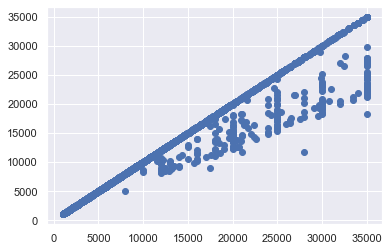

In [49]:
fig, ax = plt.subplots()
ax.scatter(data["loan_amnt"][:10000], data["funded_amnt"][:10000])

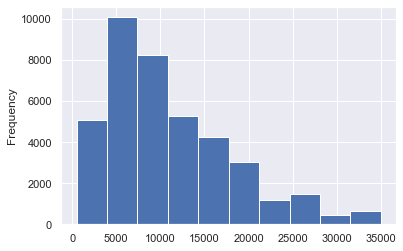

In [50]:
data.funded_amnt.plot.hist()

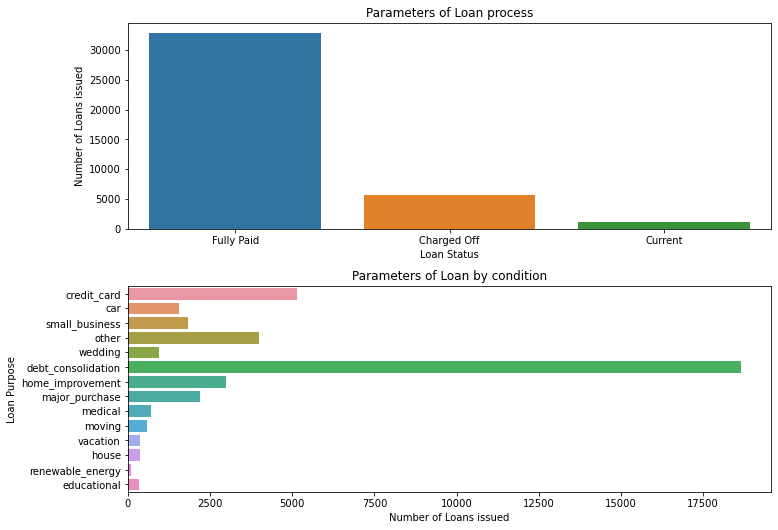

In [19]:
plt.figure(figsize=(20,18))

plt.figure(1)

# Distribution of Loans by Status
plt.subplot(5,2,1)
sns.countplot(x='loan_status', data=data)
plt.title('Parameters of Loan process')
plt.xlabel("Loan Status")
plt.ylabel("Number of Loans issued")



# Distribution of Loan by Purpose
plt.subplot(5,2,3)
sns.countplot(y='purpose', data=data)
plt.title('Parameters of Loan by condition')
plt.xlabel("Number of Loans issued")
plt.ylabel("Loan Purpose")

plt.tight_layout()
plt.show()

Distribution of loan issued to the customer

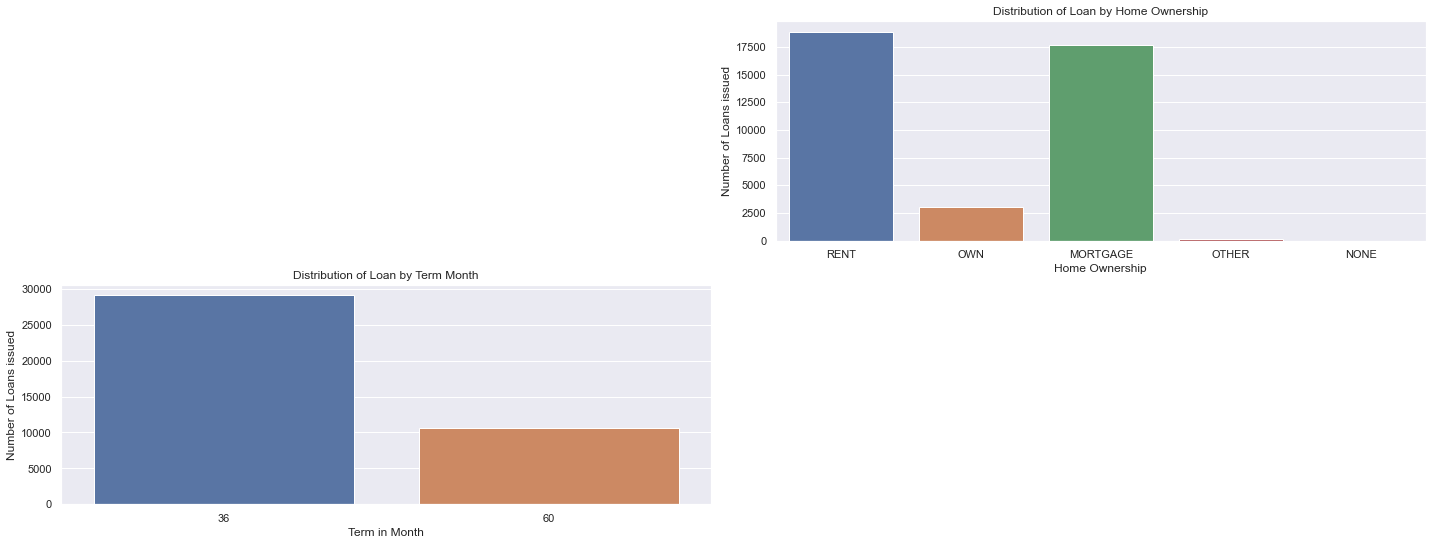

In [51]:
plt.figure(figsize=(20,18))

plt.figure(1)


# Distribution of Loan by Home Ownership
plt.subplot(5,2,4)
sns.countplot(x='home_ownership', data=data)
plt.title('Distribution of Loan by Home Ownership')
plt.xlabel("Home Ownership")
plt.ylabel("Number of Loans issued")


# Distribution of Loan by Term Month
plt.subplot(5,2,5)
sns.countplot(x='term(months)', data=data)
plt.title('Distribution of Loan by Term Month')
plt.xlabel("Term in Month")
plt.ylabel("Number of Loans issued")




# To adjust spacing between subplots
plt.tight_layout()
plt.show()

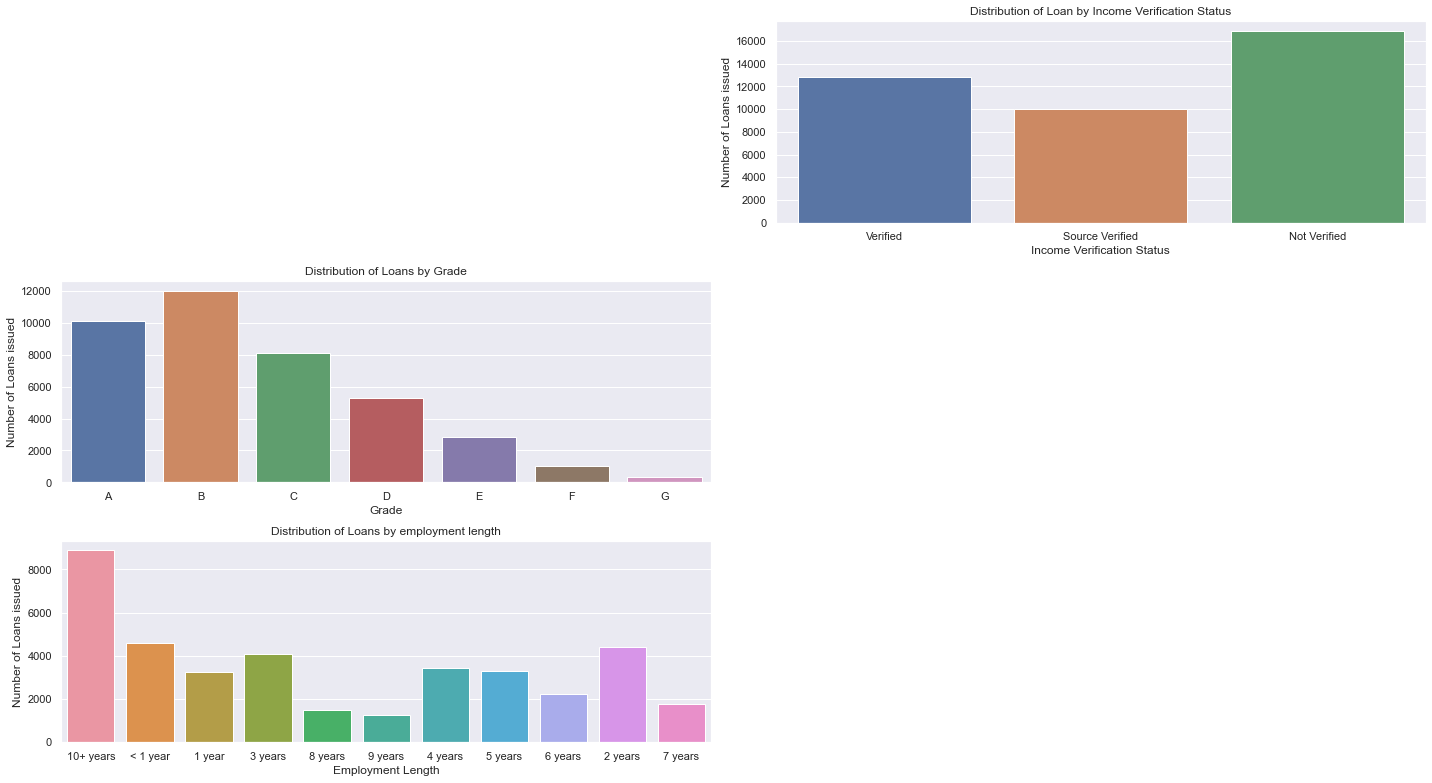

In [52]:
plt.figure(figsize=(20,18))

plt.figure(1)

# Distribution of Loan by Income Verification Status
plt.subplot(5,2,6)
sns.countplot(x='verification_status', data=data)
plt.title('Distribution of Loan by Income Verification Status')
plt.xlabel("Income Verification Status")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,7)
sns.countplot( x="grade", data=data,order = np.sort(data['grade'].unique()))
plt.title("Distribution of Loans by Grade")
plt.xlabel("Grade")
plt.ylabel("Number of Loans issued")

plt.subplot(5,2,9)
sns.countplot(x='emp_length', data=data)
plt.title('Distribution of Loans by employment length')
plt.xlabel("Employment Length")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

In [53]:
var=data['verification_status'].value_counts()
status=data['loan_status'].value_counts()
print('counts of verification status')
print(var)
print('______________________________________________________')
print('counts of loan status')

print(status)

counts of verification status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: verification_status, dtype: int64
______________________________________________________
counts of loan status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64


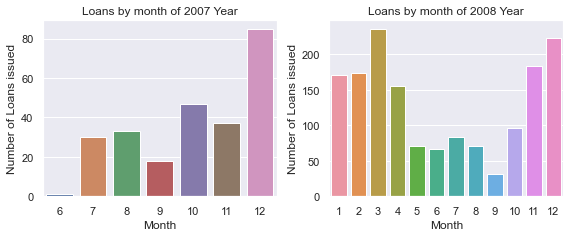

In [54]:
data['issued_month'] = data['issue_d'].dt.month
data['issued_year'] = data['issue_d'].dt.year

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,3,1)
sns.countplot(x="issued_month", data=data[data['issued_year']==2007])
plt.title("Loans by month of 2007 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,2)
sns.countplot( x="issued_month", data=data[data['issued_year']==2008])
plt.title("Loans by month of 2008 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

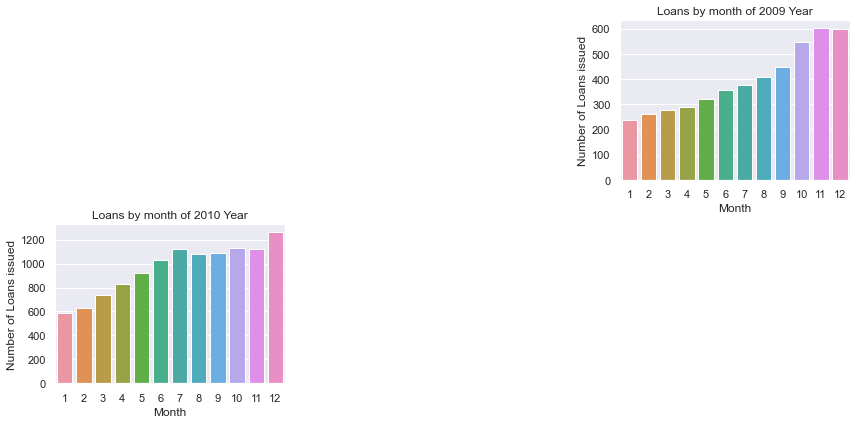

In [55]:
data['issued_month'] = data['issue_d'].dt.month
data['issued_year'] = data['issue_d'].dt.year

plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,3,3)
sns.countplot( x="issued_month", data=data[data['issued_year']==2009])
plt.title("Loans by month of 2009 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,4)
sns.countplot( x="issued_month", data=data[data['issued_year']==2010])
plt.title("Loans by month of 2010 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

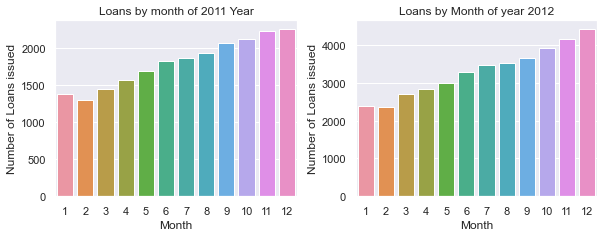

In [56]:
data['issued_month'] = data['issue_d'].dt.month
data['issued_year'] = data['issue_d'].dt.year

plt.figure(figsize=(12,6))
plt.figure(1)

plt.subplot(2,3,5)
sns.countplot( x="issued_month", data=data[data['issued_year']==2011])
plt.title("Loans by month of 2011 Year")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

plt.subplot(2,3,6)
sns.countplot( x="issued_month", data=data)
plt.title("Loans by Month of year 2012")
plt.xlabel("Month")
plt.ylabel("Number of Loans issued")

# To adjust spacing between subplots
plt.tight_layout()
plt.show()

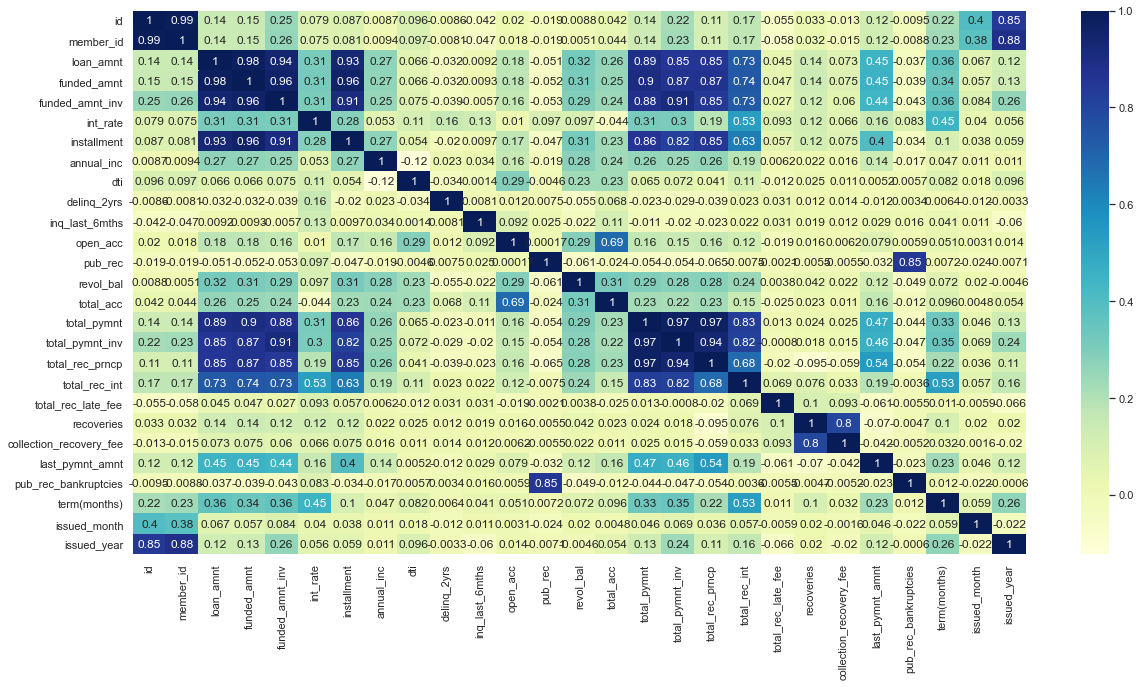

In [57]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)
plt.show()

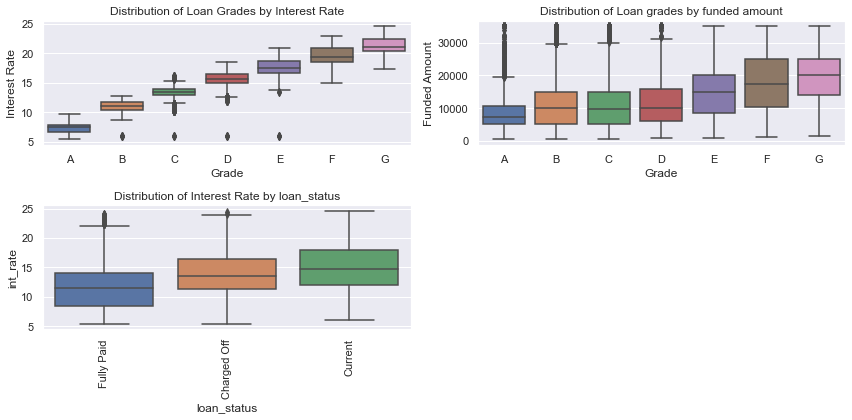

In [58]:
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(2,2,1)
sns.boxplot(x="grade", y="int_rate", data=data, order = np.sort(data['grade'].unique()))
plt.title('Distribution of Loan Grades by Interest Rate')
plt.xlabel("Grade")
plt.ylabel("Interest Rate")

# Distribution of Funded Amount by Grade
plt.subplot(2,2,2)
sns.boxplot(x="grade", y="funded_amnt" , data=data, order = np.sort(data['grade'].unique()))
plt.title('Distribution of Loan grades by funded amount')
plt.xlabel("Grade")
plt.ylabel("Funded Amount")
#plt.yscale('log')


plt.subplot(2,2,3)
sns.boxplot(x="loan_status", y='int_rate', data=data)
plt.title('Distribution of Interest Rate by loan_status')
# To rotate axis text
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

Annual income vs Employment length

<Figure size 1080x432 with 0 Axes>

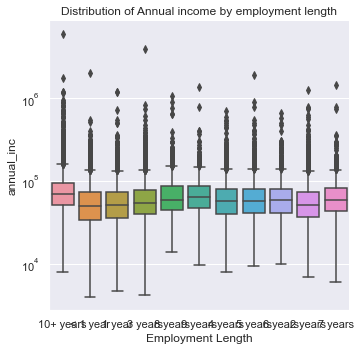

In [59]:
plt.figure(figsize=(15,6))
sns.catplot(x="emp_length", y="annual_inc",kind='box' , data=data)
plt.title('Distribution of Annual income by employment length')
plt.xlabel("Employment Length")
plt.ylabel("annual_inc")
plt.yscale('log')
plt.show()

No. of loan defaulders and loan paids by home ownership

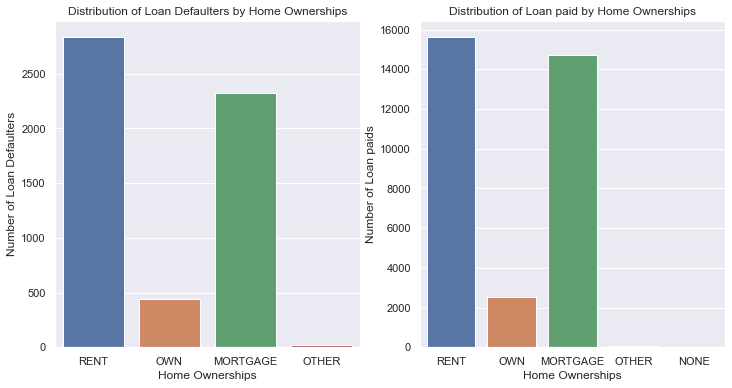

loan defaulders
 home_ownership
MORTGAGE    2327
OTHER         18
OWN          443
RENT        2839
Name: home_ownership, dtype: int64
_____________________________________________________
loan paids
 home_ownership
MORTGAGE    14694
NONE            3
OTHER          80
OWN          2532
RENT        15641
Name: home_ownership, dtype: int64


In [62]:
plt.figure(figsize=(12,6))

plt.figure(1)

plt.subplot(1,2,1)
sns.countplot(x='home_ownership',  data=data[data['loan_status']=='Charged Off'])
plt.title('Distribution of Loan Defaulters by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan Defaulters")

plt.subplot(1,2,2)
sns.countplot(x='home_ownership',  data=data[data['loan_status']=='Fully Paid'])
plt.title('Distribution of Loan paid by Home Ownerships')
plt.xlabel("Home Ownerships")
plt.ylabel("Number of Loan paids")
plt.show()

print ("loan defaulders\n",data[data['loan_status']=='Charged Off'].groupby(['home_ownership'])['home_ownership'].count())
print('_____________________________________________________')
print ("loan paids\n",data[data['loan_status']=='Fully Paid'].groupby(['home_ownership'])['home_ownership'].count())

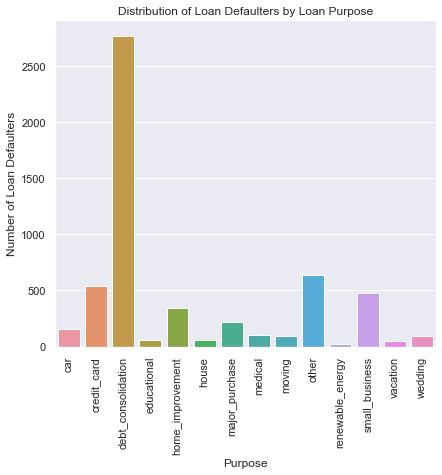

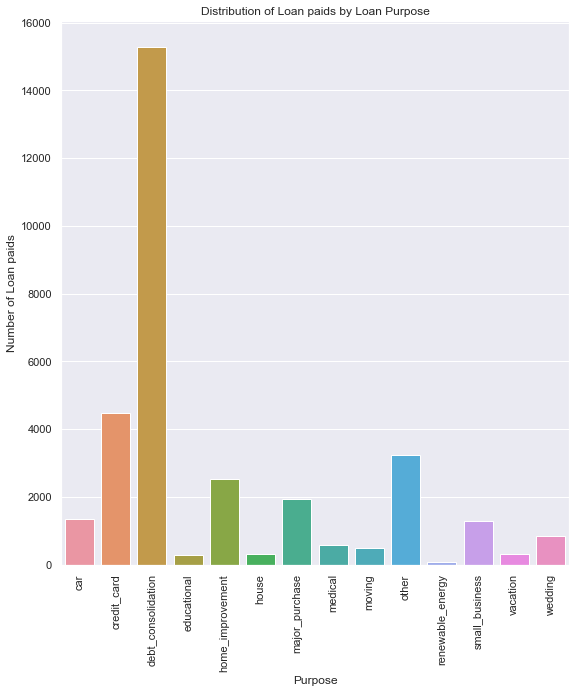

loan defaulders
 purpose
car                    160
credit_card            542
debt_consolidation    2767
educational             56
home_improvement       347
house                   59
major_purchase         222
medical                106
moving                  92
other                  633
renewable_energy        19
small_business         475
vacation                53
wedding                 96
Name: purpose, dtype: int64
__________________________________________________________
loan paids
 purpose
car                    1339
credit_card            4485
debt_consolidation    15288
educational             269
home_improvement       2528
house                   308
major_purchase         1928
medical                 575
moving                  484
other                  3232
renewable_energy         83
small_business         1279
vacation                322
wedding                 830
Name: purpose, dtype: int64


In [63]:
plt.figure(figsize=(15,6))

plt.figure(1)

plt.subplot(1,2,1)
sns.countplot(x='purpose',  data=data[data['loan_status']=='Charged Off'], order=np.sort(data['purpose'].unique()))
plt.title('Distribution of Loan Defaulters by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan Defaulters")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()


plt.subplot(1,2,2)
sns.countplot(x='purpose',  data=data[data['loan_status']=='Fully Paid'], order=np.sort(data['purpose'].unique()))
plt.title('Distribution of Loan paids by Loan Purpose')
plt.xlabel("Purpose")
plt.ylabel("Number of Loan paids")
# To rotate axis text
plt.xticks(rotation=90)
plt.show()

print ("loan defaulders\n",data[data['loan_status']=='Charged Off'].groupby(['purpose'])['purpose'].count())
print('__________________________________________________________')
print ("loan paids\n",data[data['loan_status']=='Fully Paid'].groupby(['purpose'])['purpose'].count())

## Conclusions

here high amount of loan defaulders and loan paids are from debt_consolidation